<a href="https://colab.research.google.com/github/Mark-Miller64/HW1_CSC302_Python-Visualization/blob/main/midterm_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

df=pd.read_csv('/content/drive/MyDrive/DATA/Most_Streamed_Spotify_Songs1.csv',encoding='latin-1')


In [ ]:
df['Track'] = df['Track'].str.upper()  # Convert Track column  to uppercase


In [ ]:
# Filter rows where 'Spotify Streams' or 'TikTok Posts' contains NaN exclude and create new filtered df
filtered_df = df[df['Spotify Streams'].notna() & df['TikTok Posts'].notna()]


In [ ]:
filtered_df['Spotify Streams'] = filtered_df['Spotify Streams'].str.replace(',', '').astype(int)
filtered_df['TikTok Posts'] = filtered_df['TikTok Posts'].str.replace(',', '').astype(int)

<ipython-input-7-e33b5f81eef6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Spotify Streams'] = filtered_df['Spotify Streams'].str.replace(',', '').astype(int)
<ipython-input-7-e33b5f81eef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TikTok Posts'] = filtered_df['TikTok Posts'].str.replace(',', '').astype(int)


In [ ]:
# Create a new DataFrame with specific columns using indexing
new_df = filtered_df[['Track', 'Spotify Streams', 'TikTok Posts']]



In [ ]:
# Sort values and select top 10
top_10 = new_df.nlargest(10, 'TikTok Posts')


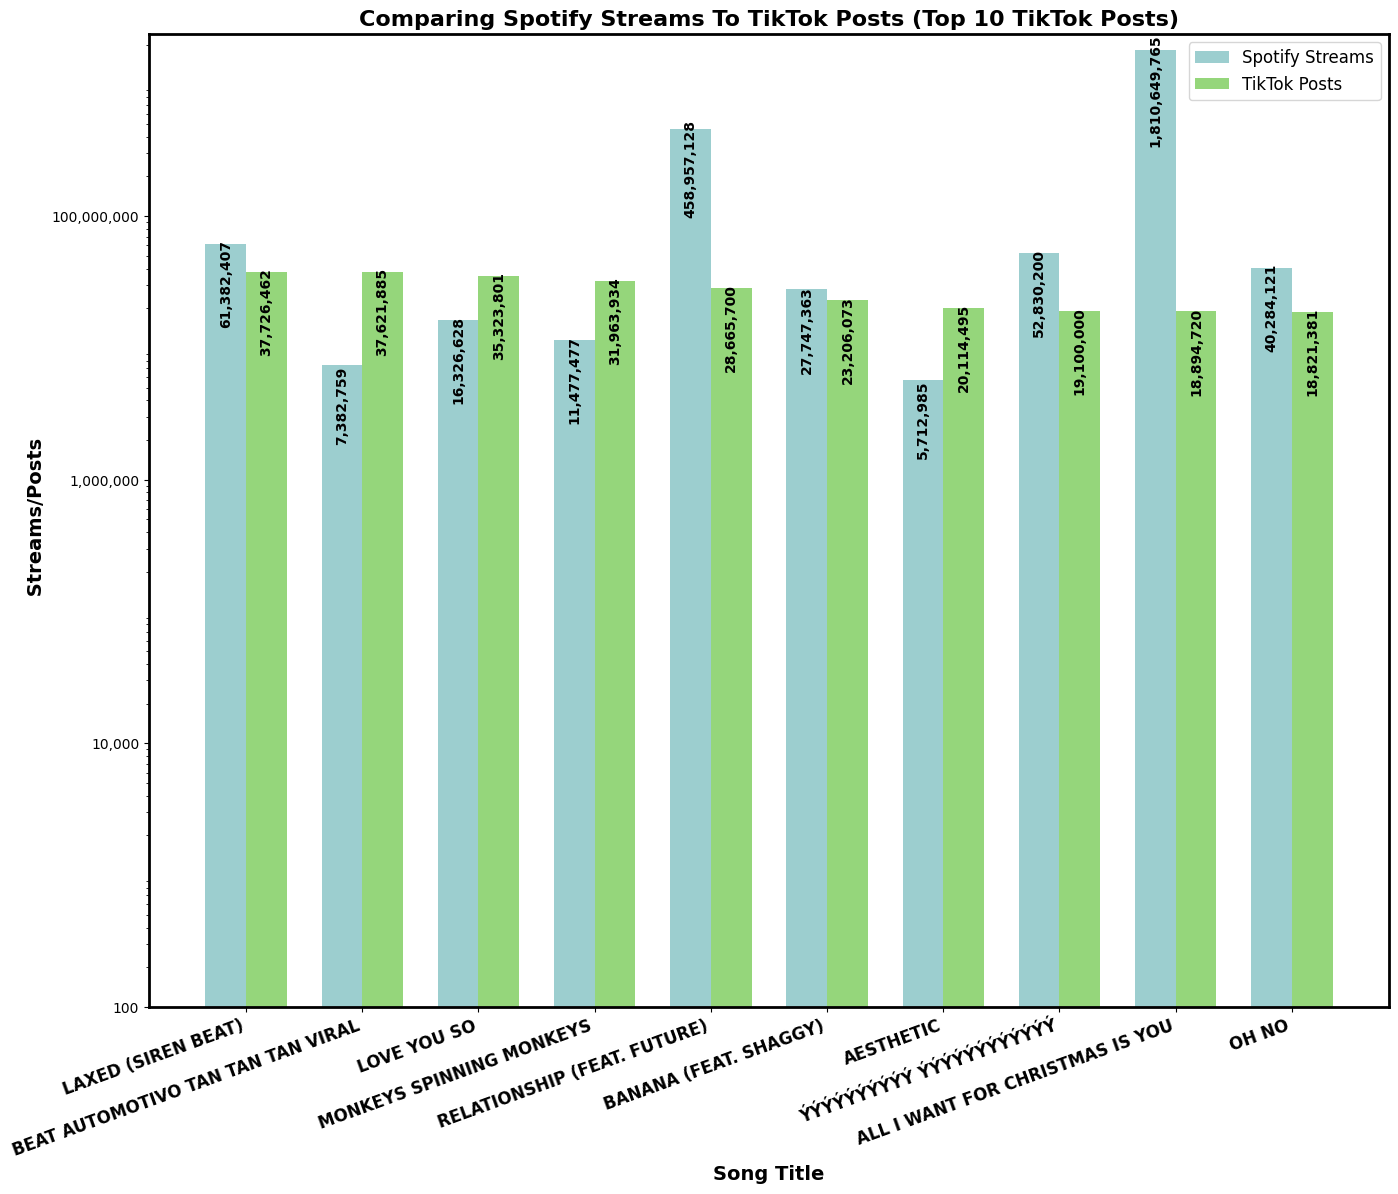

In [ ]:
# Plotting the double bar graph with logarithmic scale, annotated values with thousands comma, and custom colors
fig, ax = plt.subplots(figsize=(16, 7))

# Width of the bars
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(top_10))
r2 = [x + bar_width for x in r1]

# Plotting Group 1 bars with custom colors
bars1 = ax.bar(r1, top_10['Spotify Streams'], width=bar_width, color='#9CCECF', label='Spotify Streams')

# Plotting Group 2 bars with custom colors
bars2 = ax.bar(r2, top_10['TikTok Posts'], width=bar_width, color='#95D67B', label='TikTok Posts')

# Set logarithmic scale for y-axis
ax.set_yscale('log')


# Function to format values with thousands comma
def format_with_comma(x, pos):
    return '{:,.0f}'.format(x)

# Adding values on top of bars, centered within the bar, and adjusting position if needed
for bar in bars1:
    yval = bar.get_height()
    text_y = yval / 2
    if text_y < 15:
        text_y = 15
    ax.text(bar.get_x() + bar.get_width() / 2, text_y,
            format_with_comma(int(yval), 0),
            ha='center', va='center', color='black', rotation=90, fontsize=10, weight='bold')

for bar in bars2:
    yval = bar.get_height()
    text_y = yval / 2
    if text_y < 15:
        text_y = 15
    ax.text(bar.get_x() + bar.get_width() / 2, text_y,
            format_with_comma(int(yval), 0),
            ha='center', va='center', color='black', rotation=90, fontsize=10, weight='bold')

# Adding labels, title, and legend
ax.set_xlabel('Song Title', fontsize=14, weight='bold')
ax.set_ylabel(' Streams/Posts', fontsize=14, weight='bold')
ax.set_title('Comparing Spotify Streams To TikTok Posts (Top 10 TikTok Posts)', fontsize=16, weight='bold')
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(top_10['Track'], rotation=20, ha='right', fontsize=12, weight='bold')
ax.legend(fontsize=12, loc='upper right') # Or any other suitable location

# Formatting y-axis ticks with thousands comma and reducing the number of ticks
import matplotlib.ticker as mticker
locmaj = mticker.LogLocator(base=10, numticks=5)  # Adjust 'numticks' to control the number of ticks
ax.yaxis.set_major_locator(locmaj)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_with_comma))

# Increase border size (linewidth)
for spine in ax.spines.values():
    spine.set_linewidth(2)


# Adjust plot limits to ensure all elements are visible
plt.ylim(bottom=100)
plt.subplots_adjust(top=1.5)

# Show plot
plt.show()